<a href="https://colab.research.google.com/github/priyanu17/Regression-using-Neural-Nets/blob/master/Wine_Quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas.util.testing as tm

In [0]:
## Importing dataset

wine = pd.read_csv("winequality-white.csv", delimiter = ";")

In [5]:
# Head on data

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# Shape of data

wine.shape

(4898, 12)

In [7]:
# Columns in data:

wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [0]:
# PROBLEM STATEMENT

# Find high risk variables
# Find the dependencies between wine "quality" and wine parameters
# Find most appropriate machine learning algorithm to predict wine quality with high accuracy

In [9]:
# Target Variable

wine.columns[11]

'quality'

In [10]:
# Info on data

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [0]:
## All variables are of type float
# No categorical variables are present

In [12]:
# Describe on dataset

wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [13]:
# Dtypes on dataset

wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [0]:
## All float type entries Except the target variable

In [15]:
## Checking for duplicate entries in dataset
wine.duplicated(keep = "first").value_counts()

False    3961
True      937
dtype: int64

In [0]:
## We have duplicate entries in the data

In [0]:
# Dropping duplicate entries
wine.drop_duplicates(keep = 'first', inplace = True)

In [18]:
wine.duplicated(keep = "first").value_counts()

False    3961
dtype: int64

In [0]:
# Now, we do not have any duplicate entries in our dataset

In [0]:
# Function to check for constant feature columns in our data.
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

In [21]:
print("Constant feature columns are : ")
find_constant_features(wine)

Constant feature columns are : 


[]

In [0]:
## Thus, no constant feature columns are present in our dataset

In [0]:
# In case of constant feature columns -- they can be dropped

In [24]:
## Checking for null values in our dataset

wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [0]:
# Data does not contain any null values 

In [26]:
## Finding null percentage values for our dataset

((wine.isna().sum()/len(wine))*100).round(2)


fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [0]:
## It is 0.0 for all columns
## No null values present in our dataset


In [28]:
wine.columns.size

12

In [0]:
## Our dataset has 12 columns

# 11 Independent variables
# 1 Target/Dependet Variable

In [0]:
# Checking value_counts() for all columns in our dataset:

In [31]:
# value_counts() for columns[0:6]

for col in wine.columns[:6]:
  print("Column is : " + col)
  print(wine[col].value_counts())
  print()
  print()

Column is : fixed acidity
6.80     241
6.60     238
6.40     224
6.90     191
6.70     190
        ... 
10.70      1
4.60       1
3.90       1
6.45       1
3.80       1
Name: fixed acidity, Length: 68, dtype: int64


Column is : volatile acidity
0.280    213
0.240    208
0.260    207
0.250    179
0.220    178
        ... 
1.100      1
0.910      1
0.710      1
0.740      1
0.785      1
Name: volatile acidity, Length: 125, dtype: int64


Column is : citric acid
0.30    239
0.28    220
0.32    214
0.34    181
0.29    179
       ... 
1.66      1
0.11      1
0.86      1
0.99      1
0.91      1
Name: citric acid, Length: 87, dtype: int64


Column is : residual sugar
1.40     165
1.20     165
1.60     144
1.30     134
1.10     126
        ... 
16.60      1
20.30      1
15.90      1
13.15      1
65.80      1
Name: residual sugar, Length: 310, dtype: int64


Column is : chlorides
0.036    165
0.042    155
0.044    155
0.046    152
0.040    152
        ... 
0.120      1
0.012      1
0.346      

In [32]:
# value_counts() for columns[6:12]

for col in wine.columns[6:]:
  print("Column is : " + col)
  print(wine[col].value_counts())
  print()
  print()

Column is : total sulfur dioxide
111.0    51
114.0    47
113.0    46
122.0    45
128.0    45
         ..
25.0      1
256.0     1
48.0      1
26.0      1
219.5     1
Name: total sulfur dioxide, Length: 251, dtype: int64


Column is : density
0.99200    60
0.99280    52
0.99320    49
0.99340    46
0.99300    46
           ..
0.99507     1
0.99615     1
0.99055     1
0.99485     1
0.99341     1
Name: density, Length: 890, dtype: int64


Column is : pH
3.16    128
3.14    127
3.22    119
3.19    115
3.15    114
       ... 
3.67      1
2.74      1
3.82      1
2.82      1
2.84      1
Name: pH, Length: 103, dtype: int64


Column is : sulphates
0.50    191
0.46    182
0.44    171
0.38    165
0.45    148
       ... 
0.99      1
0.89      1
1.00      1
0.97      1
0.23      1
Name: sulphates, Length: 79, dtype: int64


Column is : alcohol
9.500000     177
9.400000     169
10.000000    143
9.200000     140
10.500000    140
            ... 
10.650000      1
10.033333      1
9.633333       1
10.933

In [0]:
## Quality is an integer in range (1-10)

In [0]:
## Analysis of the target variable

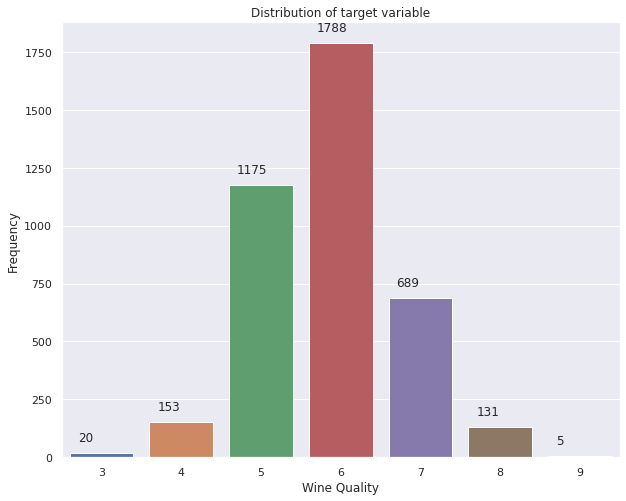

In [35]:
# Plot to visualize the target variable in the dataset:

sns.set(style="darkgrid")

plt.figure(figsize=(10,8))
ax = sns.countplot(x="quality", data=wine)
plt.title('Distribution of target variable')
plt.xlabel('Wine Quality')
plt.ylabel('Frequency')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [0]:
## Above diagram shows distribution of target variable for entire dataset

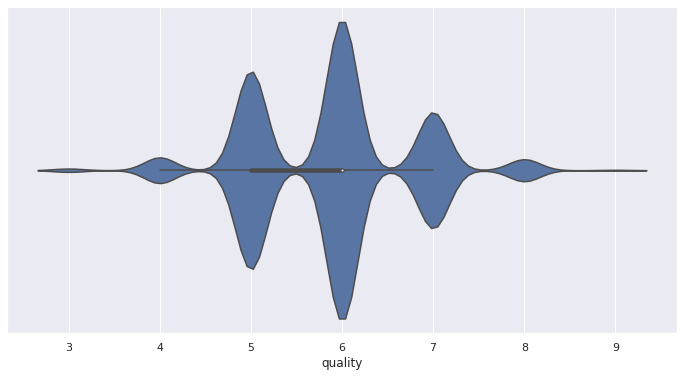

In [37]:
# Another plot of the TARGET variable "Converted"

sns.set(style="darkgrid")
plt.figure(figsize = (12, 6))
sns.violinplot(x = wine["quality"])
plt.show()

In [0]:
## Violin plot for the target varibles distribution

In [0]:
## Data can be said to be imbalanced towards quality value '6'

In [0]:
## Outlier detection in our dataset

# Using boxplots to identify potential outliers in our dataset


In [41]:
# Count of numeric columns in our dataset
wine.select_dtypes(include = ["float64"]).columns.size

11

In [0]:
## All columns are numeric in nature 
## No categorical columns

In [0]:
# Creating numeric_col list to include all numeric columns from out dataset
numeric_columns = wine.select_dtypes(include = ["float64"]).columns

In [44]:
numeric_columns
# Does not include "quality" as it is the target variable

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [0]:
# Visualization for outlier detection in our data
sns.set( palette = "muted")

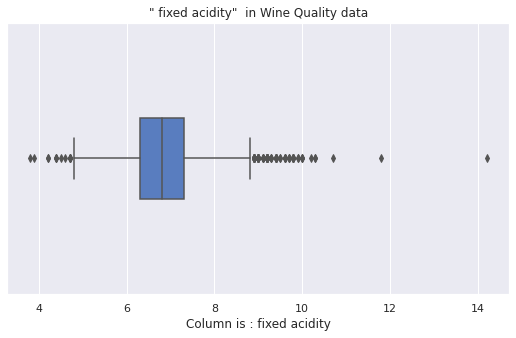

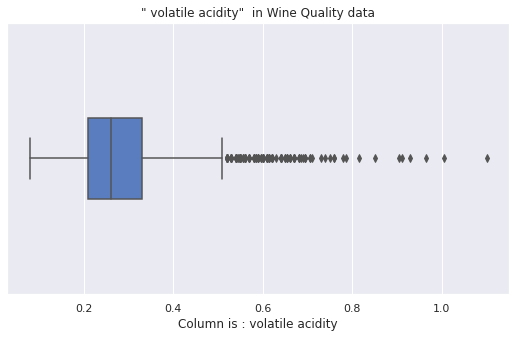

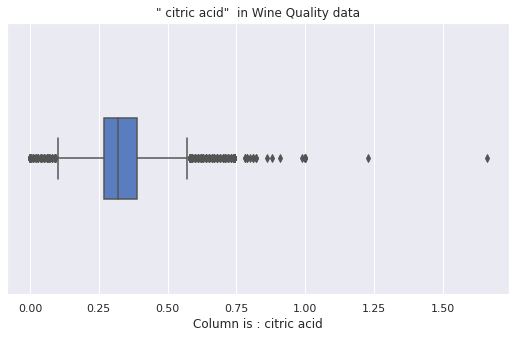

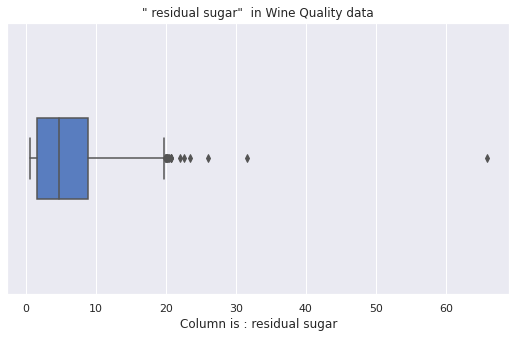

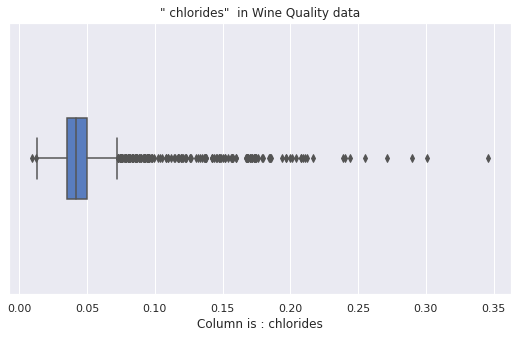

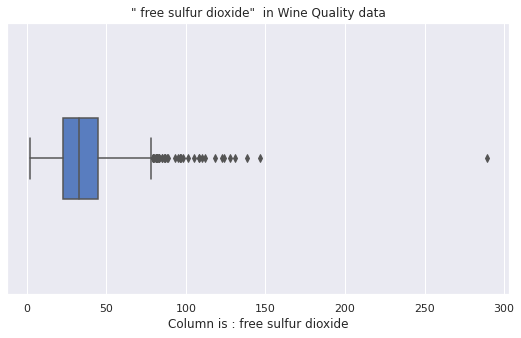

In [46]:
# Loop to visualize boxplots of numeric_columns[0:6] in our dataset:

for col in numeric_columns[:6]:
    plt.figure( figsize = (9, 5))
    sns.boxplot(x=wine[col], width = 0.3)
    plt.title("\" "+ col + "\" " + " in Wine Quality data")
    plt.xlabel("Column is : " + col)
    plt.show()
    print()
    print()

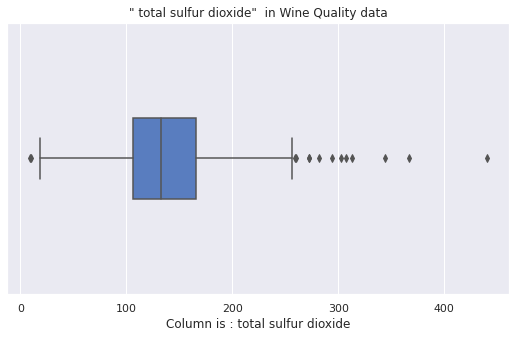

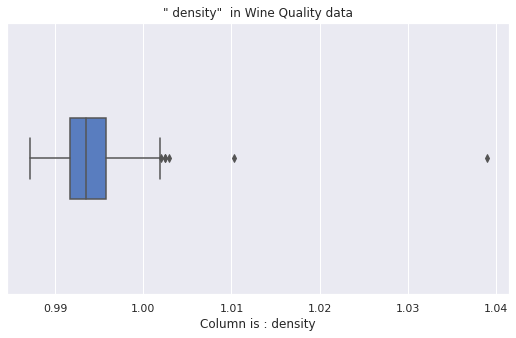

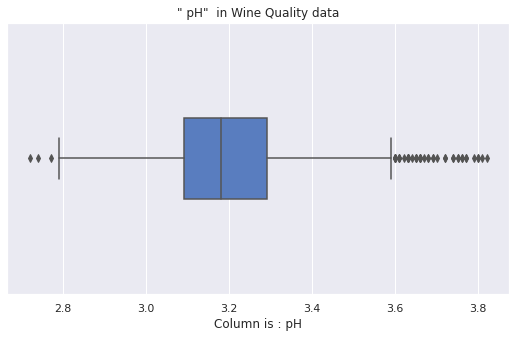

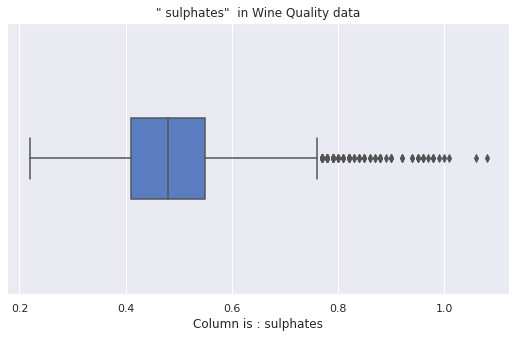

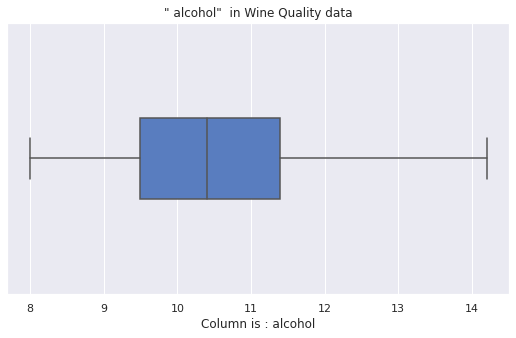

In [47]:
# Loop to visualize boxplots of numeric_columns[6:] in our dataset:

for col in numeric_columns[6:]:
    plt.figure( figsize = (9, 5))
    sns.boxplot(x=wine[col], width = 0.3)
    plt.title("\" "+ col + "\" " + " in Wine Quality data")
    plt.xlabel("Column is : " + col)
    plt.show()
    print()
    print()

In [0]:
## More visualizations

In [49]:
numeric_columns.size

11

In [0]:
# Function to analyze columns in the dataset:

def distplot_of_columns(column):    
    # Plot without default status
    plt.figure(figsize = (10, 5))
    sns.distplot(a = wine.loc[wine[column].notnull(), column], hist = True, kde = False)
    plt.title(column)
    plt.xlabel("")
    plt.ylabel("")

<Figure size 720x216 with 0 Axes>

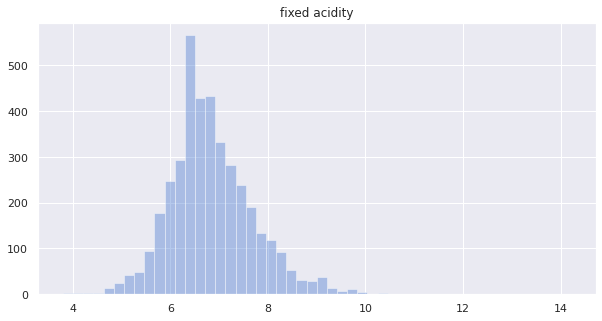

<Figure size 720x216 with 0 Axes>

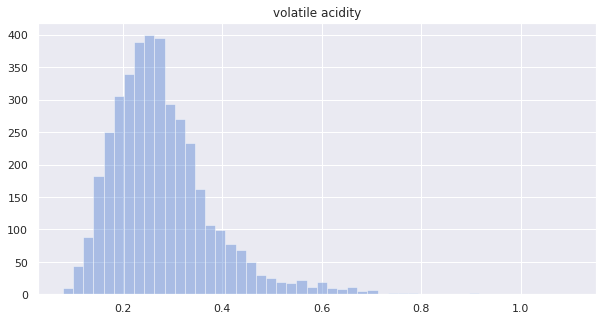

<Figure size 720x216 with 0 Axes>

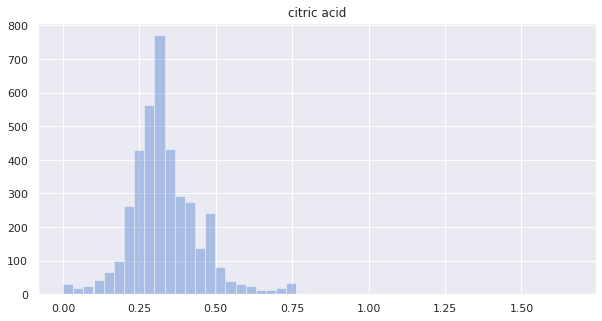

<Figure size 720x216 with 0 Axes>

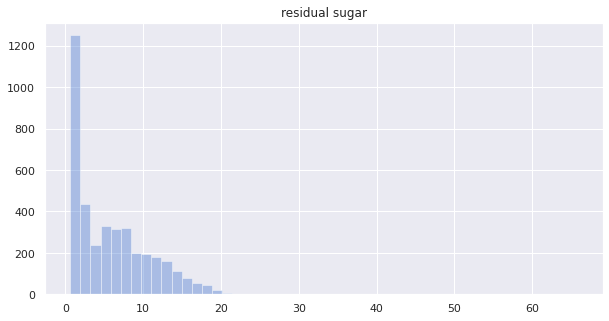

<Figure size 720x216 with 0 Axes>

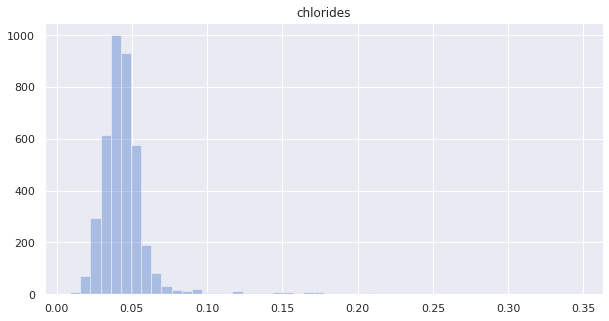

In [51]:
## Plots of various columns:

for column in numeric_columns[0:5]: 
  plt.figure(figsize= (10, 3))
  distplot_of_columns(column)
  plt.show()
  print()
  print()

<Figure size 720x216 with 0 Axes>

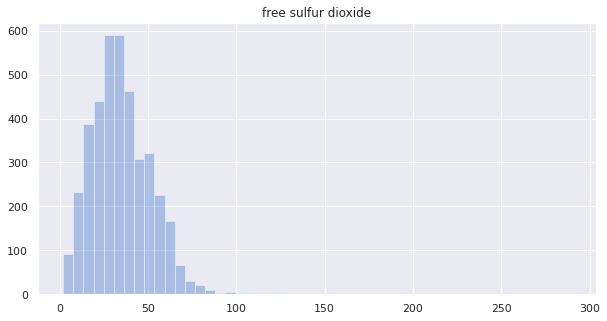

<Figure size 720x216 with 0 Axes>

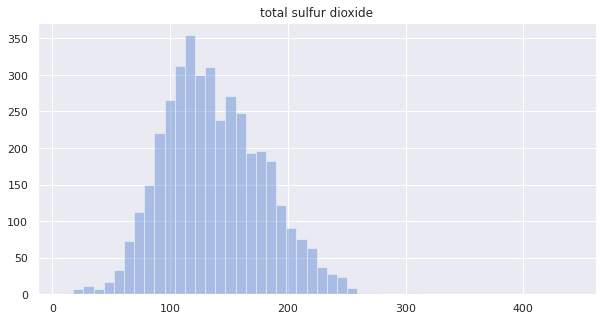

<Figure size 720x216 with 0 Axes>

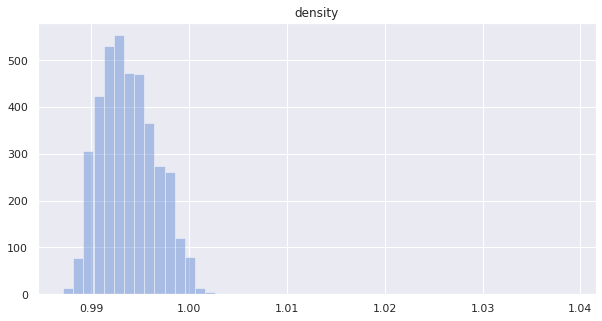

<Figure size 720x216 with 0 Axes>

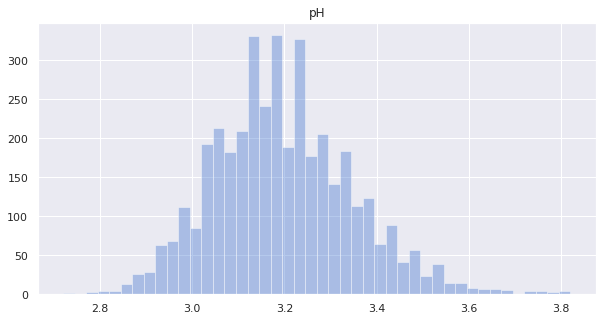

<Figure size 720x216 with 0 Axes>

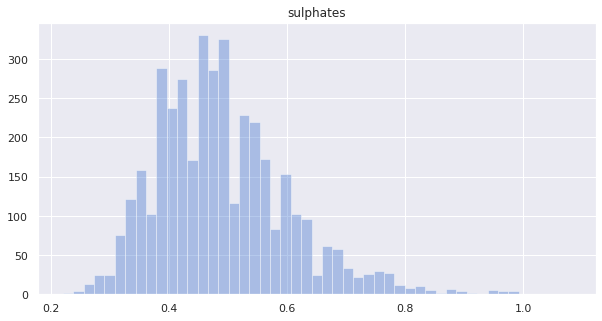

<Figure size 720x216 with 0 Axes>

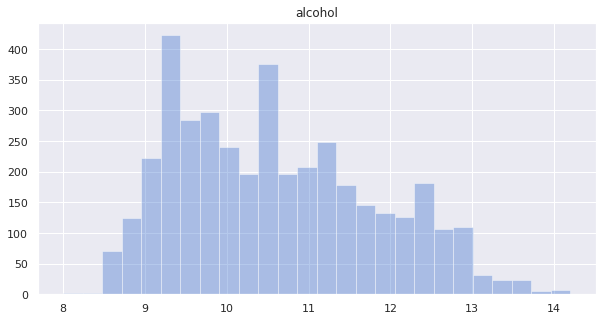

In [52]:
## Plots of various columns:

for column in numeric_columns[5:]: 
  plt.figure(figsize= (10, 3))
  distplot_of_columns(column)
  plt.show()
  print()
  print()

In [53]:
## Correlation matrix for the data:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788,-0.124636
volatile acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815,-0.190678
citric acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514,0.007065
residual sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167,-0.117339
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928,-0.217739
free sulfur dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768,0.010507
total sulfur dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643,-0.183356
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162,-0.337805
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095,0.123829
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850,0.053200


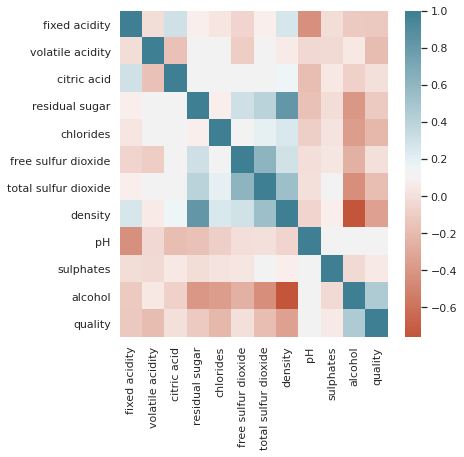

In [54]:
## Heatmap for the corelation values above
plt.figure(figsize = (6, 6))
sns.heatmap(wine.corr(), cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

In [0]:
## A few columns can be seen to have have colinearity:
## we need to find those columns with their correlation values


In [0]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [57]:
print("Top Absolute Correlations are as follows :")
print()
print(get_top_abs_correlations(wine, 10))

Top Absolute Correlations are as follows :

residual sugar        density                 0.820498
density               alcohol                 0.760162
free sulfur dioxide   total sulfur dioxide    0.619437
total sulfur dioxide  density                 0.536868
alcohol               quality                 0.462869
total sulfur dioxide  alcohol                 0.446643
fixed acidity         pH                      0.431274
residual sugar        total sulfur dioxide    0.409583
                      alcohol                 0.398167
chlorides             alcohol                 0.356928
dtype: float64


In [0]:
## Values are not above 0.9, hence we do not drop any columns 
# based on high colinearity

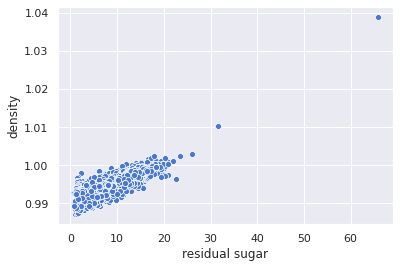

In [59]:
sns.scatterplot(x = "residual sugar", y = "density", data = wine)

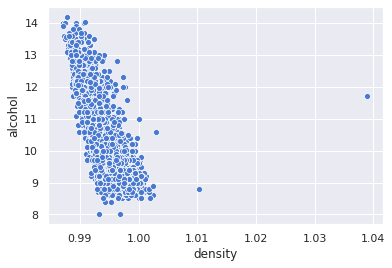

In [60]:
sns.scatterplot(x = "density", y = "alcohol", data = wine)

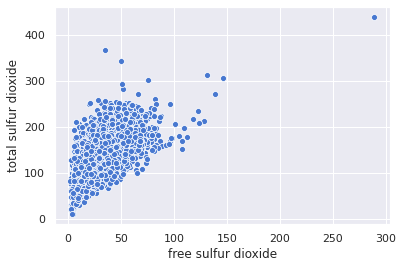

In [61]:
sns.scatterplot(x = "free sulfur dioxide", y = "total sulfur dioxide", data = wine)

In [62]:
wine["quality"].value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [0]:
## Model Building:

In [0]:
# Calssification algorithms applied:

In [0]:
## Model 1 : Multiple Linear Regression

In [0]:
# Creating X and y : matrices of dependent and independent variable
X_MR= wine.iloc[:, :-1].values
y_MR = wine.iloc[:, -1].values

In [163]:
print(X_MR)

[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]


In [164]:
print(y_MR)

[6 6 6 ... 6 7 6]


In [0]:
# Splitting the dataset into Training and Test set:
from sklearn.model_selection import train_test_split
X_MR_train, X_MR_test, y_MR_train, y_MR_test = train_test_split(X_MR, y_MR, test_size = 0.2, random_state = 0)

In [166]:
print(X_MR_train)

[[ 6.5   0.26  0.31 ...  3.22  0.62 12.6 ]
 [ 7.1   0.17  0.43 ...  3.11  0.56 11.7 ]
 [ 5.8   0.34  0.21 ...  3.16  0.49  9.8 ]
 ...
 [ 6.3   0.41  0.3  ...  3.53  0.79 11.7 ]
 [ 8.5   0.2   0.4  ...  3.    0.35 10.5 ]
 [ 6.7   0.23  0.33 ...  3.11  0.52 10.1 ]]


In [167]:
print(X_MR_test)

[[ 7.9   0.2   0.49 ...  3.16  0.47 10.5 ]
 [ 9.8   0.93  0.45 ...  3.12  0.59 10.2 ]
 [ 7.3   0.24  0.39 ...  3.17  0.51 10.9 ]
 ...
 [ 7.4   0.31  0.74 ...  3.02  0.43  8.7 ]
 [ 5.    0.46  0.18 ...  3.21  0.83 14.  ]
 [ 6.1   0.27  0.31 ...  3.24  0.46 10.9 ]]


In [168]:
# training our model:

from sklearn.linear_model import LinearRegression
regressor_MR = LinearRegression()
regressor_MR.fit(X_MR_train, y_MR_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred_MR = regressor_MR.predict(X_MR_test)

In [170]:
print(y_pred_MR)

[5.71 4.33 6.02 4.24 6.72 5.27 5.53 5.98 4.99 5.01 6.15 5.86 6.71 6.33
 5.66 6.21 5.72 5.59 6.2  6.39 5.84 5.98 5.4  5.62 5.37 5.06 5.38 4.9
 6.05 5.86 5.93 5.73 5.26 6.28 5.78 5.44 5.79 5.91 7.34 5.34 6.33 7.1
 5.33 5.75 6.15 5.72 6.38 5.43 6.3  5.18 5.74 5.66 5.5  5.16 6.45 5.99
 5.53 5.62 5.36 5.6  5.78 5.92 5.69 5.99 4.68 6.6  5.5  6.43 5.6  5.66
 5.46 6.25 5.1  6.1  5.18 5.91 6.69 5.46 5.38 5.52 5.74 6.16 5.8  5.39
 6.42 5.98 5.02 5.95 5.49 6.24 5.66 5.74 4.76 6.44 5.88 5.45 6.15 4.96
 5.63 6.12 5.65 6.26 6.14 6.11 5.01 6.15 5.61 5.5  5.2  5.79 6.11 6.56
 5.38 5.48 5.21 5.41 6.68 5.88 6.31 6.51 5.02 6.11 6.59 6.5  5.33 5.64
 6.24 5.55 5.9  6.42 5.57 4.91 6.3  6.73 5.59 4.92 6.06 6.06 6.   4.54
 5.52 5.92 5.24 5.96 6.13 5.39 5.98 5.2  6.63 5.66 6.14 5.79 5.65 6.43
 6.52 5.52 6.02 6.16 6.41 6.06 5.81 5.4  5.14 6.33 6.27 5.69 6.15 6.28
 5.6  5.55 5.62 5.2  5.89 5.67 5.88 5.44 6.37 6.36 5.3  5.56 5.53 5.53
 5.39 6.52 5.75 5.76 5.3  5.29 6.58 5.92 5.94 5.44 6.14 6.03 5.1  5.17
 5.58 6.

In [0]:
## Model 2:


In [0]:
# Creating X and y : matrices of dependent and independent variable
X_SVM= wine.iloc[:, :-1].values
y_SVM = wine.iloc[:, -1].values

In [173]:
print(X_SVM)

[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]


In [174]:
print(y_SVM)

[6 6 6 ... 6 7 6]


In [0]:
# Splitting the dataset into Training and Test set:
from sklearn.model_selection import train_test_split
X_SVM_train, X_SVM_test, y_SVM_train, y_SVM_test = train_test_split(X_SVM, y_SVM, test_size = 0.25, random_state = 0)

In [0]:
## Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_SVM_train = sc.fit_transform(X_SVM_train)
X_SVM_test = sc.transform(X_SVM_test)

In [180]:
# Training the model with Support Vector Regressor algorithm:

from sklearn.svm import SVR
regressor_SVM = SVR(kernel = 'rbf')
regressor_SVM.fit(X_SVM_train, y_SVM_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [181]:
y_pred_SVM = regressor_SVM.predict(X_SVM_test)
print(y_pred_SVM)

[5.73 4.4  6.14 4.77 6.62 5.05 5.87 5.88 4.78 4.84 6.36 6.1  6.75 6.2
 5.66 6.59 5.27 5.66 6.19 6.87 5.99 5.99 5.44 5.57 5.77 4.8  5.59 4.83
 6.16 5.61 5.7  5.32 4.91 6.1  5.47 5.14 6.09 6.18 6.26 5.32 6.4  6.65
 5.56 6.26 6.26 6.   6.08 5.25 5.9  4.65 5.87 5.6  5.22 5.02 6.55 6.07
 5.61 5.6  4.93 5.16 5.97 5.95 5.85 5.71 4.71 6.77 6.05 6.9  5.26 5.5
 5.08 5.79 5.23 6.09 5.46 5.92 6.48 5.41 4.74 5.63 5.58 6.04 6.05 5.36
 6.6  6.1  4.88 5.84 6.13 6.19 5.61 5.65 5.03 5.37 6.52 5.29 6.1  5.04
 5.66 6.06 5.33 6.84 6.14 6.13 5.25 6.05 5.98 5.22 5.22 5.82 6.67 7.08
 5.62 5.14 5.3  5.16 7.02 5.66 6.53 6.68 4.93 5.62 6.56 6.35 4.94 5.32
 6.58 5.19 5.92 6.95 5.74 4.83 6.42 6.3  5.82 5.51 6.06 6.18 5.96 5.03
 5.64 5.68 4.88 6.06 6.13 5.21 5.94 4.67 6.5  5.55 5.99 5.48 5.95 6.46
 6.6  5.55 6.41 5.83 6.4  6.   5.79 5.08 4.12 6.68 6.24 5.49 5.98 5.93
 6.23 5.93 5.17 5.44 5.51 5.66 6.14 5.49 7.15 6.8  5.22 5.16 5.96 5.27
 5.47 6.38 5.63 5.94 5.2  5.26 5.63 5.97 5.97 5.32 6.27 5.83 5.49 5.12
 5.34 6.

In [0]:
## Model 3:

In [0]:
# Creating X and y : matrices of dependent and independent variable
X_DT= wine.iloc[:, :-1].values
y_DT = wine.iloc[:, -1].values

In [0]:
# Splitting the dataset into Training and Test set:
from sklearn.model_selection import train_test_split
X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(X_DT, y_DT, test_size = 0.25, random_state = 0)

In [185]:
# Training the model : Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeClassifier( random_state = 0)
regressor_DT.fit(X_DT_train,y_DT_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [186]:
y_pred_DT = regressor_DT.predict(X_DT_test)
print(y_pred_DT)

[6 4 8 5 8 5 5 6 5 4 6 5 6 5 5 8 5 5 6 4 7 5 5 5 5 5 6 6 7 6 6 4 4 6 5 5 6
 5 6 5 5 6 6 6 6 5 7 5 6 4 6 6 5 5 8 6 5 6 5 6 6 6 6 7 5 7 8 7 5 7 5 6 4 6
 4 6 7 6 5 6 6 6 6 4 7 6 5 6 5 6 6 7 5 8 6 5 6 5 6 7 4 6 4 6 5 4 6 5 5 6 7
 8 5 5 5 6 7 6 7 6 4 7 7 7 5 5 8 5 5 7 8 6 8 7 5 5 7 6 5 6 6 4 5 6 7 5 6 5
 6 6 6 5 6 7 6 5 7 5 6 7 6 5 4 7 6 5 6 5 6 6 5 5 6 6 6 6 6 8 8 6 6 5 6 8 6
 6 5 5 4 6 6 6 7 6 5 5 6 6 4 6 5 7 7 6 6 8 6 5 6 5 7 6 6 6 6 5 6 6 6 6 6 6
 5 6 6 4 7 4 6 5 7 6 6 5 6 7 7 6 6 5 5 6 7 7 6 5 6 5 6 6 7 5 6 5 5 6 5 5 5
 6 5 5 6 6 4 6 5 7 5 6 8 5 7 7 5 5 6 4 4 6 5 6 5 5 5 6 5 7 5 6 5 5 6 6 6 6
 5 5 6 6 5 6 5 5 7 6 6 7 5 6 5 5 5 6 5 6 6 6 6 5 5 6 7 8 6 6 5 5 6 6 6 8 6
 5 6 5 6 5 7 5 4 6 4 4 7 6 5 7 6 7 6 6 6 5 5 5 6 4 8 4 6 4 5 8 6 5 7 7 7 6
 6 7 6 5 6 5 6 6 5 7 6 6 6 7 4 5 6 5 6 7 6 5 6 7 6 6 7 7 6 6 7 6 5 5 6 6 7
 5 6 6 6 6 5 7 5 7 6 5 6 7 6 5 7 6 6 6 6 7 5 5 5 6 5 7 6 6 8 5 5 5 6 7 7 5
 6 6 6 6 6 5 5 5 7 6 5 6 5 6 7 5 5 6 6 5 7 6 6 5 7 5 8 6 4 6 5 5 4 7 6 5 6
 7 5 6 6 5 7 7 5 6 5 4 5 

In [0]:
## Applying Neural nets to our data:

In [121]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# Creating X and y : matrices of dependent and independent variable
X_ann= wine.iloc[:, :-1].values
y_ann = wine.iloc[:, -1].values

In [123]:
print(X_ann)

[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]


In [124]:
print(y_ann)

[6 6 6 ... 6 7 6]


In [0]:
# Splitting the dataset into Training and Test set:
from sklearn.model_selection import train_test_split
X_ann_train, X_ann_test, y_ann_train, y_ann_test = train_test_split(X_ann, y_ann, test_size = 0.25, random_state = 0)

In [0]:
## Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ann_train = sc.fit_transform(X_ann_train)
X_ann_test = sc.transform(X_ann_test)

In [0]:
## Building the Arificial Neural Network:

In [0]:
ann = tf.keras.models.Sequential()

In [0]:
## Input Layer added automatically
# Adding the first layer of the network
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [0]:
## Adding second layer:
ann.add(tf.keras.layers.Dense(units = 8, activation = 'relu'))

In [0]:
## Adding third layer:
ann.add(tf.keras.layers.Dense(units = 10, activation = 'relu'))

In [0]:
## Adding output layer:
ann.add(tf.keras.layers.Dense(units = 1))

In [0]:
## Next part: Compiling the ann
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [141]:
## Training the ann:
ann.fit( X_ann_train, y_ann_train, batch_size = 16, epochs= 60)

Epoch 1/60
186/186 [==============================] - 0s 998us/step - loss: 8.6279
Epoch 2/60
186/186 [==============================] - 0s 1ms/step - loss: 2.9557
Epoch 3/60
186/186 [==============================] - 0s 1ms/step - loss: 2.1050
Epoch 4/60
186/186 [==============================] - 0s 1ms/step - loss: 1.5964
Epoch 5/60
186/186 [==============================] - 0s 1ms/step - loss: 1.2421
Epoch 6/60
186/186 [==============================] - 0s 1ms/step - loss: 0.9927
Epoch 7/60
186/186 [==============================] - 0s 970us/step - loss: 0.8263
Epoch 8/60
186/186 [==============================] - 0s 975us/step - loss: 0.7272
Epoch 9/60
186/186 [==============================] - 0s 1ms/step - loss: 0.6705
Epoch 10/60
186/186 [==============================] - 0s 1ms/step - loss: 0.6330
Epoch 11/60
186/186 [==============================] - 0s 996us/step - loss: 0.6107
Epoch 12/60
186/186 [==============================] - 0s 948us/step - loss: 0.5975
Epoch 13/60
186

In [142]:
## Predicting the Test Set result :

y_pred_ann = ann.predict(X_ann_test)
np.set_printoptions(precision= 2)
print( np.concatenate(( y_pred_ann.reshape(len(y_pred_ann), 1), y_ann_test.reshape(len(y_ann_test), 1)  ), 1  )  )

[[5.57 5.  ]
 [4.78 4.  ]
 [6.3  5.  ]
 ...
 [6.34 7.  ]
 [6.27 6.  ]
 [5.73 6.  ]]


In [146]:
y_ann_test

array([5, 4, 5, 3, 7, 6, 6, 5, 6, 4, 7, 6, 8, 6, 6, 6, 5, 6, 7, 8, 4, 6,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 7, 7, 5, 4, 5, 7, 5, 7, 7, 6, 6,
       5, 6, 7, 5, 5, 5, 6, 6, 5, 5, 7, 7, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6,
       8, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 4, 5, 5, 6, 5, 6, 6, 7, 5, 6,
       6, 6, 5, 5, 5, 3, 6, 5, 7, 5, 5, 5, 5, 6, 6, 6, 5, 3, 6, 5, 6, 5,
       5, 7, 6, 6, 5, 5, 7, 6, 7, 6, 7, 6, 6, 7, 4, 5, 8, 5, 6, 7, 6, 6,
       7, 7, 7, 6, 7, 7, 6, 6, 5, 5, 4, 7, 8, 5, 3, 5, 8, 6, 7, 4, 5, 6,
       7, 6, 6, 6, 6, 6, 6, 6, 5, 7, 6, 7, 6, 5, 6, 6, 5, 5, 7, 6, 6, 5,
       7, 8, 4, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 7, 6, 6, 7, 6, 5, 5, 5, 6,
       5, 7, 5, 6, 7, 6, 6, 8, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 7, 6,
       6, 6, 5, 6, 5, 8, 4, 6, 7, 5, 6, 4, 5, 5, 7, 7, 6, 7, 5, 5, 5, 6,
       8, 7, 7, 6, 7, 5, 6, 6, 6, 5, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 5,
       5, 7, 5, 6, 6, 6, 7, 5, 6, 7, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 7,
       6, 7, 5, 7, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5,